In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv("/content/drive/My Drive/Data_Science_Project/australian airline/train_2.csv")
df_cat = pd.read_csv("/content/drive/My Drive/Data_Science_Project/australian airline/category.csv")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
df.head()

,City1,City2,Passenger_Trips,Aircraft_Trips,RPKs,ASKs,Seats,Month_num,load_factor,city_pair,avg_ac_capacity,daily_ac_trips,est_daily_TOC
0,ALBURY,SYDNEY,12665,323,5724580.0,8372396.0,18523,1,68.4,ALBURYSYDNEY,57.0,10.42,39780.02
1,ALBURY,SYDNEY,15546,459,7026792.0,10958740.0,24245,2,64.1,ALBURYSYDNEY,53.0,15.83,60433.56
2,ALBURY,SYDNEY,12140,435,5487280.0,10427188.0,23069,3,52.6,ALBURYSYDNEY,53.0,14.03,53561.77
3,ALBURY,SYDNEY,314,41,141928.0,877784.0,1942,4,16.2,ALBURYSYDNEY,47.0,1.37,5230.19
4,ALBURY,SYDNEY,416,33,188032.0,793712.0,1756,5,23.7,ALBURYSYDNEY,53.0,1.06,4046.72


In [6]:
# ['City1','City2','Passenger_Trips','Aircraft_Trips','RPKs','ASKs','Seats','est_daily_TOC']

# ONE HOT ENCODING

In [7]:
df_20_new = pd.get_dummies(data=df, columns=['city_pair'])

In [8]:
df_20_new

,City1,City2,Passenger_Trips,Aircraft_Trips,RPKs,ASKs,Seats,Month_num,load_factor,avg_ac_capacity,daily_ac_trips,est_daily_TOC,city_pair_ADELAIDEALICE SPRINGS,city_pair_ADELAIDEBRISBANE,city_pair_ADELAIDECANBERRA,city_pair_ADELAIDEGOLD COAST,city_pair_ADELAIDEMELBOURNE,city_pair_ADELAIDEPERTH,city_pair_ADELAIDEPORT LINCOLN,city_pair_ADELAIDESYDNEY,city_pair_ALBURYSYDNEY,city_pair_ALICE SPRINGSDARWIN,city_pair_ALICE SPRINGSMELBOURNE,city_pair_ALICE SPRINGSSYDNEY,city_pair_ARMIDALESYDNEY,city_pair_AYERS ROCKSYDNEY,city_pair_BALLINASYDNEY,city_pair_BRISBANECAIRNS,city_pair_BRISBANECANBERRA,city_pair_BRISBANEDARWIN,city_pair_BRISBANEEMERALD,city_pair_BRISBANEGLADSTONE,city_pair_BRISBANEHAMILTON ISLAND,city_pair_BRISBANEHOBART,city_pair_BRISBANEMACKAY,city_pair_BRISBANEMELBOURNE,city_pair_BRISBANEMORANBAH,city_pair_BRISBANEMOUNT ISA,city_pair_BRISBANENEWCASTLE,city_pair_BRISBANEPERTH,...,city_pair_BRISBANESYDNEY,city_pair_BRISBANETOWNSVILLE,city_pair_BROOMEPERTH,city_pair_BUNDABERGBRISBANE,city_pair_CAIRNSMELBOURNE,city_pair_CAIRNSSYDNEY,city_pair_CAIRNSTOWNSVILLE,city_pair_CANBERRAMELBOURNE,city_pair_CANBERRASYDNEY,city_pair_COFFS HARBOURSYDNEY,city_pair_DARWINMELBOURNE,city_pair_DARWINPERTH,city_pair_DARWINSYDNEY,city_pair_DUBBOSYDNEY,city_pair_GERALDTONPERTH,city_pair_GOLD COASTSYDNEY,city_pair_HAMILTON ISLANDMELBOURNE,city_pair_HAMILTON ISLANDSYDNEY,city_pair_HOBARTMELBOURNE,city_pair_HOBARTSYDNEY,city_pair_KALGOORLIEPERTH,city_pair_KARRATHAPERTH,city_pair_LAUNCESTONMELBOURNE,city_pair_LAUNCESTONSYDNEY,city_pair_MELBOURNEGOLD COAST,city_pair_MELBOURNEMILDURA,city_pair_MELBOURNENEWCASTLE,city_pair_MELBOURNEPERTH,city_pair_MELBOURNESYDNEY,city_pair_MELBOURNETOWNSVILLE,city_pair_PERTHNEWMAN,city_pair_PERTHPORT HEDLAND,city_pair_PERTHSYDNEY,city_pair_PORT MACQUARIESYDNEY,city_pair_PROSERPINESYDNEY,city_pair_SUNSHINE COASTMELBOURNE,city_pair_SUNSHINE COASTSYDNEY,city_pair_SYDNEYTAMWORTH,city_pair_SYDNEYTOWNSVILLE,city_pair_SYDNEYWAGGA WAGGA
0,ALBURY,SYDNEY,12665,323,5724580.0,8372396.0,18523,1,68.4,57.0,10.42,39780.02,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ALBURY,SYDNEY,15546,459,7026792.0,10958740.0,24245,2,64.1,53.0,15.83,60433.56,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ALBURY,SYDNEY,12140,435,5487280.0,10427188.0,23069,3,52.6,53.0,14.03,53561.77,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ALBURY,SYDNEY,314,41,141928.0,877784.0,1942,4,16.2,47.0,1.37,5230.19,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ALBURY,SYDNEY,416,33,188032.0,793712.0,1756,5,23.7,53.0,1.06,4046.72,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,SYDNEY,WAGGA WAGGA,269,48,98723.0,838595.0,2285,4,11.8,48.0,1.60,5717.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
431,SYDNEY,WAGGA WAGGA,549,37,201483.0,723724.0,1972,5,27.8,53.0,1.19,4252.26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
432,SYDNEY,WAGGA WAGGA,0,0,0.0,0.0,0,6,0.0,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Checking Corralation

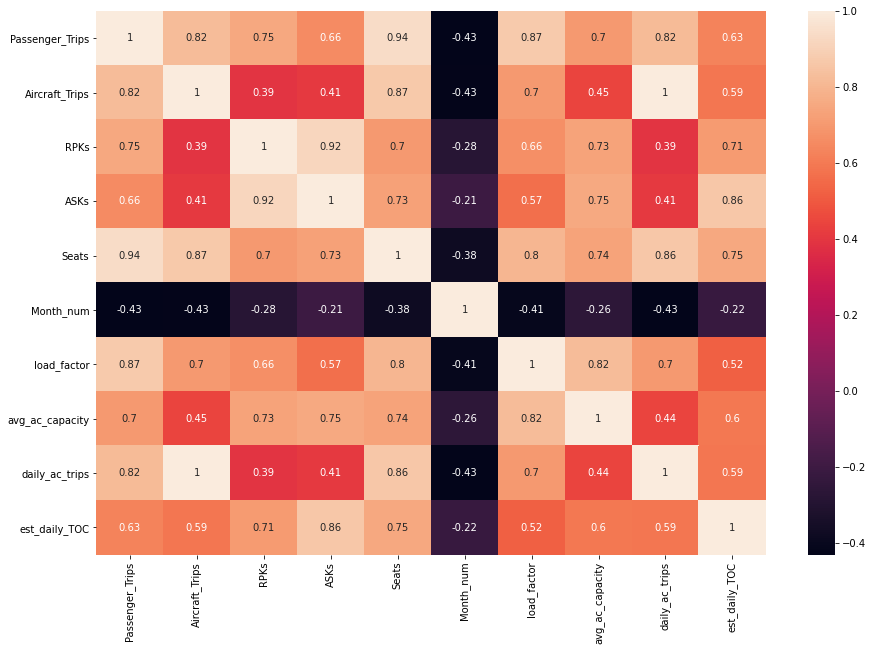

In [9]:
corr = df.corr()
plt.figure(figsize=(15,10))   
sns.heatmap(corr, annot=True) 
plt.show()                 

# Feature Selection

In [10]:
df_20_new.drop(columns=['City1','City2','Passenger_Trips','Aircraft_Trips','RPKs','ASKs','Seats','est_daily_TOC'],inplace=True)

In [11]:
df_20_new

,Month_num,load_factor,avg_ac_capacity,daily_ac_trips,city_pair_ADELAIDEALICE SPRINGS,city_pair_ADELAIDEBRISBANE,city_pair_ADELAIDECANBERRA,city_pair_ADELAIDEGOLD COAST,city_pair_ADELAIDEMELBOURNE,city_pair_ADELAIDEPERTH,city_pair_ADELAIDEPORT LINCOLN,city_pair_ADELAIDESYDNEY,city_pair_ALBURYSYDNEY,city_pair_ALICE SPRINGSDARWIN,city_pair_ALICE SPRINGSMELBOURNE,city_pair_ALICE SPRINGSSYDNEY,city_pair_ARMIDALESYDNEY,city_pair_AYERS ROCKSYDNEY,city_pair_BALLINASYDNEY,city_pair_BRISBANECAIRNS,city_pair_BRISBANECANBERRA,city_pair_BRISBANEDARWIN,city_pair_BRISBANEEMERALD,city_pair_BRISBANEGLADSTONE,city_pair_BRISBANEHAMILTON ISLAND,city_pair_BRISBANEHOBART,city_pair_BRISBANEMACKAY,city_pair_BRISBANEMELBOURNE,city_pair_BRISBANEMORANBAH,city_pair_BRISBANEMOUNT ISA,city_pair_BRISBANENEWCASTLE,city_pair_BRISBANEPERTH,city_pair_BRISBANEPROSERPINE,city_pair_BRISBANEROCKHAMPTON,city_pair_BRISBANESYDNEY,city_pair_BRISBANETOWNSVILLE,city_pair_BROOMEPERTH,city_pair_BUNDABERGBRISBANE,city_pair_CAIRNSMELBOURNE,city_pair_CAIRNSSYDNEY,city_pair_CAIRNSTOWNSVILLE,city_pair_CANBERRAMELBOURNE,city_pair_CANBERRASYDNEY,city_pair_COFFS HARBOURSYDNEY,city_pair_DARWINMELBOURNE,city_pair_DARWINPERTH,city_pair_DARWINSYDNEY,city_pair_DUBBOSYDNEY,city_pair_GERALDTONPERTH,city_pair_GOLD COASTSYDNEY,city_pair_HAMILTON ISLANDMELBOURNE,city_pair_HAMILTON ISLANDSYDNEY,city_pair_HOBARTMELBOURNE,city_pair_HOBARTSYDNEY,city_pair_KALGOORLIEPERTH,city_pair_KARRATHAPERTH,city_pair_LAUNCESTONMELBOURNE,city_pair_LAUNCESTONSYDNEY,city_pair_MELBOURNEGOLD COAST,city_pair_MELBOURNEMILDURA,city_pair_MELBOURNENEWCASTLE,city_pair_MELBOURNEPERTH,city_pair_MELBOURNESYDNEY,city_pair_MELBOURNETOWNSVILLE,city_pair_PERTHNEWMAN,city_pair_PERTHPORT HEDLAND,city_pair_PERTHSYDNEY,city_pair_PORT MACQUARIESYDNEY,city_pair_PROSERPINESYDNEY,city_pair_SUNSHINE COASTMELBOURNE,city_pair_SUNSHINE COASTSYDNEY,city_pair_SYDNEYTAMWORTH,city_pair_SYDNEYTOWNSVILLE,city_pair_SYDNEYWAGGA WAGGA
0,1,68.4,57.0,10.42,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,64.1,53.0,15.83,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,52.6,53.0,14.03,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,16.2,47.0,1.37,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,23.7,53.0,1.06,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,4,11.8,48.0,1.60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
431,5,27.8,53.0,1.19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
432,6,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
433,7,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Train Test Split 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
X = df_20_new.drop(columns='daily_ac_trips')
y = df_20_new['daily_ac_trips']

In [15]:
X

,Month_num,load_factor,avg_ac_capacity,city_pair_ADELAIDEALICE SPRINGS,city_pair_ADELAIDEBRISBANE,city_pair_ADELAIDECANBERRA,city_pair_ADELAIDEGOLD COAST,city_pair_ADELAIDEMELBOURNE,city_pair_ADELAIDEPERTH,city_pair_ADELAIDEPORT LINCOLN,city_pair_ADELAIDESYDNEY,city_pair_ALBURYSYDNEY,city_pair_ALICE SPRINGSDARWIN,city_pair_ALICE SPRINGSMELBOURNE,city_pair_ALICE SPRINGSSYDNEY,city_pair_ARMIDALESYDNEY,city_pair_AYERS ROCKSYDNEY,city_pair_BALLINASYDNEY,city_pair_BRISBANECAIRNS,city_pair_BRISBANECANBERRA,city_pair_BRISBANEDARWIN,city_pair_BRISBANEEMERALD,city_pair_BRISBANEGLADSTONE,city_pair_BRISBANEHAMILTON ISLAND,city_pair_BRISBANEHOBART,city_pair_BRISBANEMACKAY,city_pair_BRISBANEMELBOURNE,city_pair_BRISBANEMORANBAH,city_pair_BRISBANEMOUNT ISA,city_pair_BRISBANENEWCASTLE,city_pair_BRISBANEPERTH,city_pair_BRISBANEPROSERPINE,city_pair_BRISBANEROCKHAMPTON,city_pair_BRISBANESYDNEY,city_pair_BRISBANETOWNSVILLE,city_pair_BROOMEPERTH,city_pair_BUNDABERGBRISBANE,city_pair_CAIRNSMELBOURNE,city_pair_CAIRNSSYDNEY,city_pair_CAIRNSTOWNSVILLE,city_pair_CANBERRAMELBOURNE,city_pair_CANBERRASYDNEY,city_pair_COFFS HARBOURSYDNEY,city_pair_DARWINMELBOURNE,city_pair_DARWINPERTH,city_pair_DARWINSYDNEY,city_pair_DUBBOSYDNEY,city_pair_GERALDTONPERTH,city_pair_GOLD COASTSYDNEY,city_pair_HAMILTON ISLANDMELBOURNE,city_pair_HAMILTON ISLANDSYDNEY,city_pair_HOBARTMELBOURNE,city_pair_HOBARTSYDNEY,city_pair_KALGOORLIEPERTH,city_pair_KARRATHAPERTH,city_pair_LAUNCESTONMELBOURNE,city_pair_LAUNCESTONSYDNEY,city_pair_MELBOURNEGOLD COAST,city_pair_MELBOURNEMILDURA,city_pair_MELBOURNENEWCASTLE,city_pair_MELBOURNEPERTH,city_pair_MELBOURNESYDNEY,city_pair_MELBOURNETOWNSVILLE,city_pair_PERTHNEWMAN,city_pair_PERTHPORT HEDLAND,city_pair_PERTHSYDNEY,city_pair_PORT MACQUARIESYDNEY,city_pair_PROSERPINESYDNEY,city_pair_SUNSHINE COASTMELBOURNE,city_pair_SUNSHINE COASTSYDNEY,city_pair_SYDNEYTAMWORTH,city_pair_SYDNEYTOWNSVILLE,city_pair_SYDNEYWAGGA WAGGA
0,1,68.4,57.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,64.1,53.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,52.6,53.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,16.2,47.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,23.7,53.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,4,11.8,48.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
431,5,27.8,53.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
432,6,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
433,7,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [16]:
y

0      10.42
1      15.83
2      14.03
3       1.37
4       1.06
       ...  
430     1.60
431     1.19
432     0.00
433     0.00
434     0.00
Name: daily_ac_trips, Length: 435, dtype: float64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7, random_state = 123)

# Machine Learning

## Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .7, random_state = 42) # Robust
rf = RandomForestRegressor(max_depth=2) #max iter --> makin besar nilainya makin lama
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [20]:
y_rf = rf.predict(X_test) #0.05 

In [21]:
print("Train Accuracy:",rf.score(X_train, y_train).round(2))
print("Test Accuracy:",rf.score(X_test, y_test).round(2))

Train Accuracy: 0.78
Test Accuracy: 0.75


In [22]:
MAE_rf = mean_absolute_error(y_test,y_rf )

MSE_rf = mean_squared_error(y_test, y_rf)

RMSE_rf = np.sqrt(MSE_rf)

R2_rf = r2_score(y_test, y_rf)

avg_target = (df_20_new['load_factor']).mean()

MAPE = ((MAE_rf/avg_target)*100).round(2)

In [23]:
print("Hasil Evaluation Matrix : ")
print("MAE : ", MAE_rf)
print("MSE : ", MSE_rf)
print("RMSE : ", RMSE_rf)
print("R2 : ", R2_rf)
print(f"MAPE : {MAPE} %")

Hasil Evaluation Matrix : 
MAE :  0.9078496695067307
MSE :  3.3271290999641865
RMSE :  1.8240419677091277
R2 :  0.7480723443653243
MAPE : 3.87 %


## hyper parameter

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
modelRF = RandomForestRegressor()
param_RF = {"n_estimators" : [350,375,400],
            "max_depth" : [2,3,4],
            "min_samples_split" : [10,20,30],
            "min_samples_leaf" :[10,20,30]}

In [26]:
hyper_rf = GridSearchCV(estimator=modelRF, param_grid=param_RF, n_jobs = -1, cv = 5, verbose=1 )

In [27]:
hyper_rf.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [28]:
hyper_rf.best_params_

{'max_depth': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 400}

In [29]:
hyper_rf.best_score_

0.695579599099619

In [30]:
hyper_rf.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [31]:
RF_Tuned = hyper_rf.best_estimator_

In [32]:
y_tunedRF = RF_Tuned.predict(X_test)

In [33]:
print("Train Accuracy:",hyper_rf.score(X_train, y_train).round(2))
print("Test Accuracy:",hyper_rf.score(X_test, y_test).round(2))

Train Accuracy: 0.78
Test Accuracy: 0.73


In [34]:
MAE_tunedRF = mean_absolute_error(y_test,y_tunedRF )

MSE_tunedRF = mean_squared_error(y_test, y_tunedRF)

RMSE_tunedRF = np.sqrt(MSE_tunedRF)

R2_tunedRF = r2_score(y_test, y_tunedRF)

avg_target = (df_20_new['load_factor']).mean()

MAPE_tunedRF = ((MAE_tunedRF/avg_target)*100).round(2)

In [35]:
print("Hasil Evaluation Matrix : ")
print("MAE : ", MAE_tunedRF)
print("MSE : ", MSE_tunedRF)
print("RMSE : ", RMSE_tunedRF)
print("R2 : ", R2_tunedRF)
print(f"MAPE : {MAPE_tunedRF} %")

Hasil Evaluation Matrix : 
MAE :  1.0700794955279114
MSE :  3.5121758959805507
RMSE :  1.8740800132279707
R2 :  0.7340607433416031
MAPE : 4.56 %


## XGBoost (Overfit)

In [36]:
from xgboost import XGBRegressor

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .7, random_state = 42) # Robust

In [38]:
xg = XGBRegressor(max_depth=1, learning_rate=0.1, n_estimators=65, gamma=0, colsample_bytree=1, subsample=1, reg_alpha=0, reg_lambda=1)

In [39]:
xg.fit(X_train,y_train)

[12:59:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=1, min_child_weight=1, missing=None, n_estimators=65,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [40]:
y_xg = xg.predict(X_test)

In [41]:
print("Train Accuracy:",xg.score(X_train, y_train).round(2))
print("Test Accuracy:",xg.score(X_test, y_test).round(2))

Train Accuracy: 0.74
Test Accuracy: 0.7


In [42]:
MAE_xg = mean_absolute_error(y_test,y_xg )

MSE_xg = mean_squared_error(y_test, y_xg)

RMSE_xg = np.sqrt(MSE_xg)

R2_xg = r2_score(y_test, y_xg)

avg_target = (df_20_new['load_factor']).mean()

MAPE_xg = ((MAE_xg/avg_target)*100).round(2)

#-------------------------------------------------------------------------------------------------

print("Hasil Evaluation Matrix : ")
print("MAE : ", MAE_xg)
print("MSE : ", MSE_xg)
print("RMSE : ", RMSE_xg)
print("R2 : ", R2_xg)
print(f"MAPE : {MAPE_xg} %")

Hasil Evaluation Matrix : 
MAE :  1.2781689686892461
MSE :  3.941900888674408
RMSE :  1.9854220933278666
R2 :  0.7015222975150925
MAPE : 5.45 %


## SVR (BEST)

In [43]:
from sklearn.svm import SVR

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .7, random_state = 42) # Robust
regressor = SVR(kernel='rbf',C=4,gamma=0.0008,max_iter=7000) #max iter --> makin besar nilainya makin lama
regressor.fit(X_train,y_train)

SVR(C=4, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0008,
    kernel='rbf', max_iter=7000, shrinking=True, tol=0.001, verbose=False)

In [45]:
y_svc = regressor.predict(X_test) #0.05 

In [46]:
print("Train Accuracy:",regressor.score(X_train, y_train).round(2))
print("Test Accuracy:",regressor.score(X_test, y_test).round(2))

Train Accuracy: 0.74
Test Accuracy: 0.76


In [47]:
MAE_svc = mean_absolute_error(y_test,y_svc )

MSE_svc = mean_squared_error(y_test, y_svc)

RMSE_svc = np.sqrt(MSE_svc)

R2_svc = r2_score(y_test, y_svc)

avg_target = (df_20_new['load_factor']).mean()

MAPE = ((MAE_svc/avg_target)*100).round(2)

In [48]:
print("Hasil Evaluation Matrix : ")
print("MAE : ", MAE_svc)
print("MSE : ", MSE_svc)
print("RMSE : ", RMSE_svc)
print("R2 : ", R2_svc)
print(f"MAPE : {MAPE} %")

Hasil Evaluation Matrix : 
MAE :  0.8868418529511582
MSE :  3.206579522789338
RMSE :  1.7906924701883733
R2 :  0.757200265601004
MAPE : 3.78 %


# Prediction Test

In [57]:
city1 = input('Select City From :')
city2 =input('Select City  To :')
month = int(input('Input Month :'))
load_factor = int(input('Input Load Factor :'))
seat = int(input('Input Avalable Seat :'))
citypair = city1+city2
citypair = citypair.upper()
encode = df_cat[df_cat['city_pair_copy']==citypair].head(1)
encode = encode.values.tolist()
encode = encode[0][1:]
encode[0:0] = [month,load_factor,seat]
loadfactor_pred = (regressor.predict([encode])[0]).round()
print(f'Estimate Daily Aircraft Trips : {loadfactor_pred}')

Select City From :albury
Select City  To :sydney
Input Month :2
Input Load Factor :64
Input Avalable Seat :57
Estimate Daily Aircraft Trips : 12.0


# Final Decision from Machine Learning Model Train & Testing

#### From Machine Learning we had did above, We choose **SVR Algorithm** as the BEST model which We will use for prediction.

#### Because as we see above, **SVR** gave the best score in Train and Test (Good Fitting) 

In [50]:
print("Train Accuracy:",regressor.score(X_train, y_train).round(2))
print("Test Accuracy:",regressor.score(X_test, y_test).round(2))

Train Accuracy: 0.74
Test Accuracy: 0.76


#### The Evaluation Metrics also gave the best score in MAE , MAPE  and R2 


In [51]:
print("SVR Evaluation Metrics Result : ")
print("MAE : ", (MAE_svc).round(2))
print(f"MAPE : {MAPE} %")
print("R2 : ", (R2_svc).round(2))

SVR Evaluation Metrics Result : 
MAE :  0.89
MAPE : 3.78 %
R2 :  0.76


#### Why I Prefer to Choose MAE rather than RMSE or MSE?

Because, We have to predict the demand of the passenger based on the recent traffic and available seat, than We predict how many times the Aircraft Fly in a spesific route will be possible tomorrow.

If we predict in **Albury - Sydney** Route, in **Month 2** , Average Load Factor is **64** ,and the Airline want give **57** available seat.

And the prediction was **12**
and the Actual is **15**

The Airline **loss** their Customers because the just fly **12** times but actually **15** times.

>it is not a big deal, because this machine learning, only predict how could the aircraft fly as efficient as possible.

We better to **trade off** the traffic than we fly with the **empty customers**. Flying with the empty customer is more dangerous for they finances.

When we should use **RMSE** ? When we would predict **potential engine failure** or **safety score** for the aircraft, because if we wrong to predict, we **trade off** the people life , money, and the future of the company.

https://travel.detik.com/travel-news/d-4956063/emoh-terbang-tanpa-penumpang-59-maskapai-grounded-semua-pesawat


## Conclution and Sugesstion

### Conclution :

After We know about our machine learning performance, we get the conclution that this machine learning :
1. Only predict how many possible times the aircraft could fly in a spesific route , month and load factor based on their traffic before.

2. We couldn't predict the traffic, reveneu because the dataset just provide Monthly traffic, and we know this year we found **anomaly** with the traffic because of **government policy**.

3. From this Dataset, we also predict the **scheduled maintenance** for the aircraft in the future, because we predict how many times the aircraft fly and exactly we could predict total landings and total flight hours  from the aircraft, total landings and flight hours is one of the standard in aviaton industry to predict the scheduled maintenance.  
https://en.wikipedia.org/wiki/Aircraft_maintenance_checks#A_check

### Suggestion :

1. Because of this Model only predict how many times the average from the aircraft could fly in a route, We could boost the traffic based on the prediction with a special promo like AirAsia Indonesia, they give a special promo just pay Rp.1.500.000, we could fly **unlimited** in 6 month in all destination in Indonesia which airasia provided.

2. We could predict more accurate  if we get the daily traffic, so the decission will be better than this machine learning.

3. The Airline should **consider** about the ticket price after get the prediction of this model.

# Export Model --> Best SVR 

In [52]:
# import joblib

In [53]:
# joblib.dump()

In [54]:
# joblib.dump(regressor, 'ModelAusAirline')

NameError: ignored